<a href="https://colab.research.google.com/github/dellaanima/AIFFEL_QUEST/blob/master/DLBasic/Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드 및 전처리

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [2]:
# 불러온 데이터를 학습셋, 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.25)

2110848/2110848 [==============================] - 0s 0us/step


In [5]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

# Reuters 데이터셋 로드
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 훈련 데이터셋을 훈련 데이터와 검증 데이터로 분리 (25%를 검증 데이터로 설정)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류의 개수 출력
print("훈련 데이터 개수:", len(train_data))
print("검증 데이터 개수:", len(val_data))
print("테스트 데이터 개수:", len(test_data))
print("레이블 종류 개수:", len(set(train_labels)))




훈련 데이터 개수: 6736
검증 데이터 개수: 2246
테스트 데이터 개수: 2246
레이블 종류 개수: 46


In [8]:
import numpy as np

def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        results[i, sequence] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_val_labels = to_categorical(val_labels)
one_hot_test_labels = to_categorical(test_labels)


# 모델 구성 및 컴파일

In [9]:
from keras import models, layers

# 신경망 모델 구성 (예시로 BatchNormalization과 Dropout 적용)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())  # BatchNormalization 추가
model.add(layers.Dropout(0.5))          # Dropout 추가
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())  # BatchNormalization 추가
model.add(layers.Dropout(0.5))          # Dropout 추가
model.add(layers.Dense(46, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 구조 확인
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint 콜백 설정
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# 모델 학습
history = model.fit(x_train, one_hot_train_labels, epochs=100, batch_size=64, validation_data=(x_val, one_hot_val_labels), callbacks=[model_checkpoint, early_stopping])


Epoch 1/100
106/106 [==============================] - 2s 20ms/step - loss: 0.5055 - accuracy: 0.8774 - val_loss: 1.0839 - val_accuracy: 0.8032
Epoch 2/100
106/106 [==============================] - 2s 17ms/step - loss: 0.4655 - accuracy: 0.8888 - val_loss: 1.0998 - val_accuracy: 0.8161
Epoch 3/100
106/106 [==============================] - 2s 18ms/step - loss: 0.4462 - accuracy: 0.8906 - val_loss: 1.1048 - val_accuracy: 0.8130
Epoch 4/100
106/106 [==============================] - 3s 24ms/step - loss: 0.4368 - accuracy: 0.8921 - val_loss: 1.0725 - val_accuracy: 0.8157
Epoch 5/100
106/106 [==============================] - 2s 19ms/step - loss: 0.4194 - accuracy: 0.8952 - val_loss: 1.0735 - val_accuracy: 0.8224
Epoch 6/100
106/106 [==============================] - 2s 20ms/step - loss: 0.4103 - accuracy: 0.8992 - val_loss: 1.0664 - val_accuracy: 0.8126
Epoch 7/100
106/106 [==============================] - 2s 18ms/step - loss: 0.3972 - accuracy: 0.9029 - val_loss: 1.0801 - val_accuracy:

<ipython-input-18-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


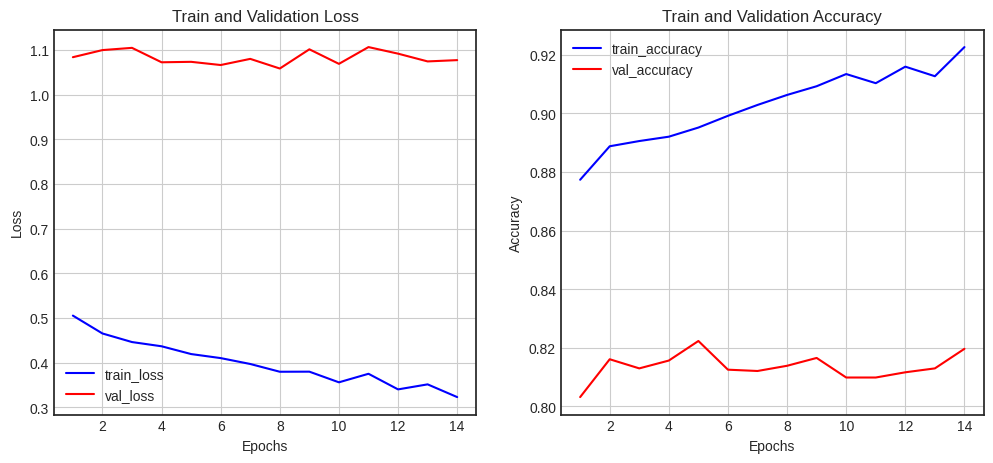

In [18]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [20]:
# 테스트 데이터셋을 이용해 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, one_hot_test_labels)

print("테스트 데이터셋 손실:", test_loss)
print("테스트 데이터셋 정확도:", test_accuracy)


71/71 [==============================] - 0s 4ms/step - loss: 1.1599 - accuracy: 0.7876
테스트 데이터셋 손실: 1.15985107421875
테스트 데이터셋 정확도: 0.7876224517822266
